Y = not ((x1 or not x3 or x4) and (not x2 or x3 or not x4))

In [1]:
from dobslit_senai_a3 import *

In [2]:
class MySat(GroverAlgorithm):
    def prepare(self): #Alocação de qubits
        #Cria um qubit para cada variável
        self.x1 = self.create_qubit('x1')
        self.x2 = self.create_qubit('x2')
        self.x3 = self.create_qubit('x3')
        self.x4 = self.create_qubit('x4')

        #Cria qubits auxiliares
        self.aux1 = self.create_qubit('aux1')
        self.aux2 = self.create_qubit('aux2')

        #Cria qubit de resultado
        self.y = self.create_qubit('y')
        
    def build_search_space(self):
        self.h(self.x1)
        self.h(self.x2)
        self.h(self.x3)
        self.h(self.x4)

        #aux1 = (x1 or not x3 or x4)
        self.logic_not(self.x3)
        self.logic_or([self.x1, self.x3, self.x4], self.aux1)
        self.logic_not(self.x3)

        #aux2 = (not x2 or x3 or not x4)
        self.logic_not(self.x2)
        self.logic_not(self.x4)
        self.logic_or([self.x2, self.x3, self.x4], self.aux2)
        self.logic_not(self.x4)
        self.logic_not(self.x2)

        #y = not (aux1 and aux2)
        self.logic_and([self.aux1, self.aux2], self.y)
        self.logic_not(self.y)
        
    def revert_search_space(self):
        self.logic_not(self.y)
        self.logic_and([self.aux1, self.aux2], self.y)
        
        self.logic_not(self.x2)
        self.logic_not(self.x4)
        self.logic_or_dg([self.x2, self.x3, self.x4], self.aux2)
        self.logic_not(self.x4)
        self.logic_not(self.x2)

        self.logic_not(self.x3)
        self.logic_or([self.x1, self.x3, self.x4], self.aux1)
        self.logic_not(self.x3)

        self.h(self.x4)
        self.h(self.x3)
        self.h(self.x2)
        self.h(self.x1)

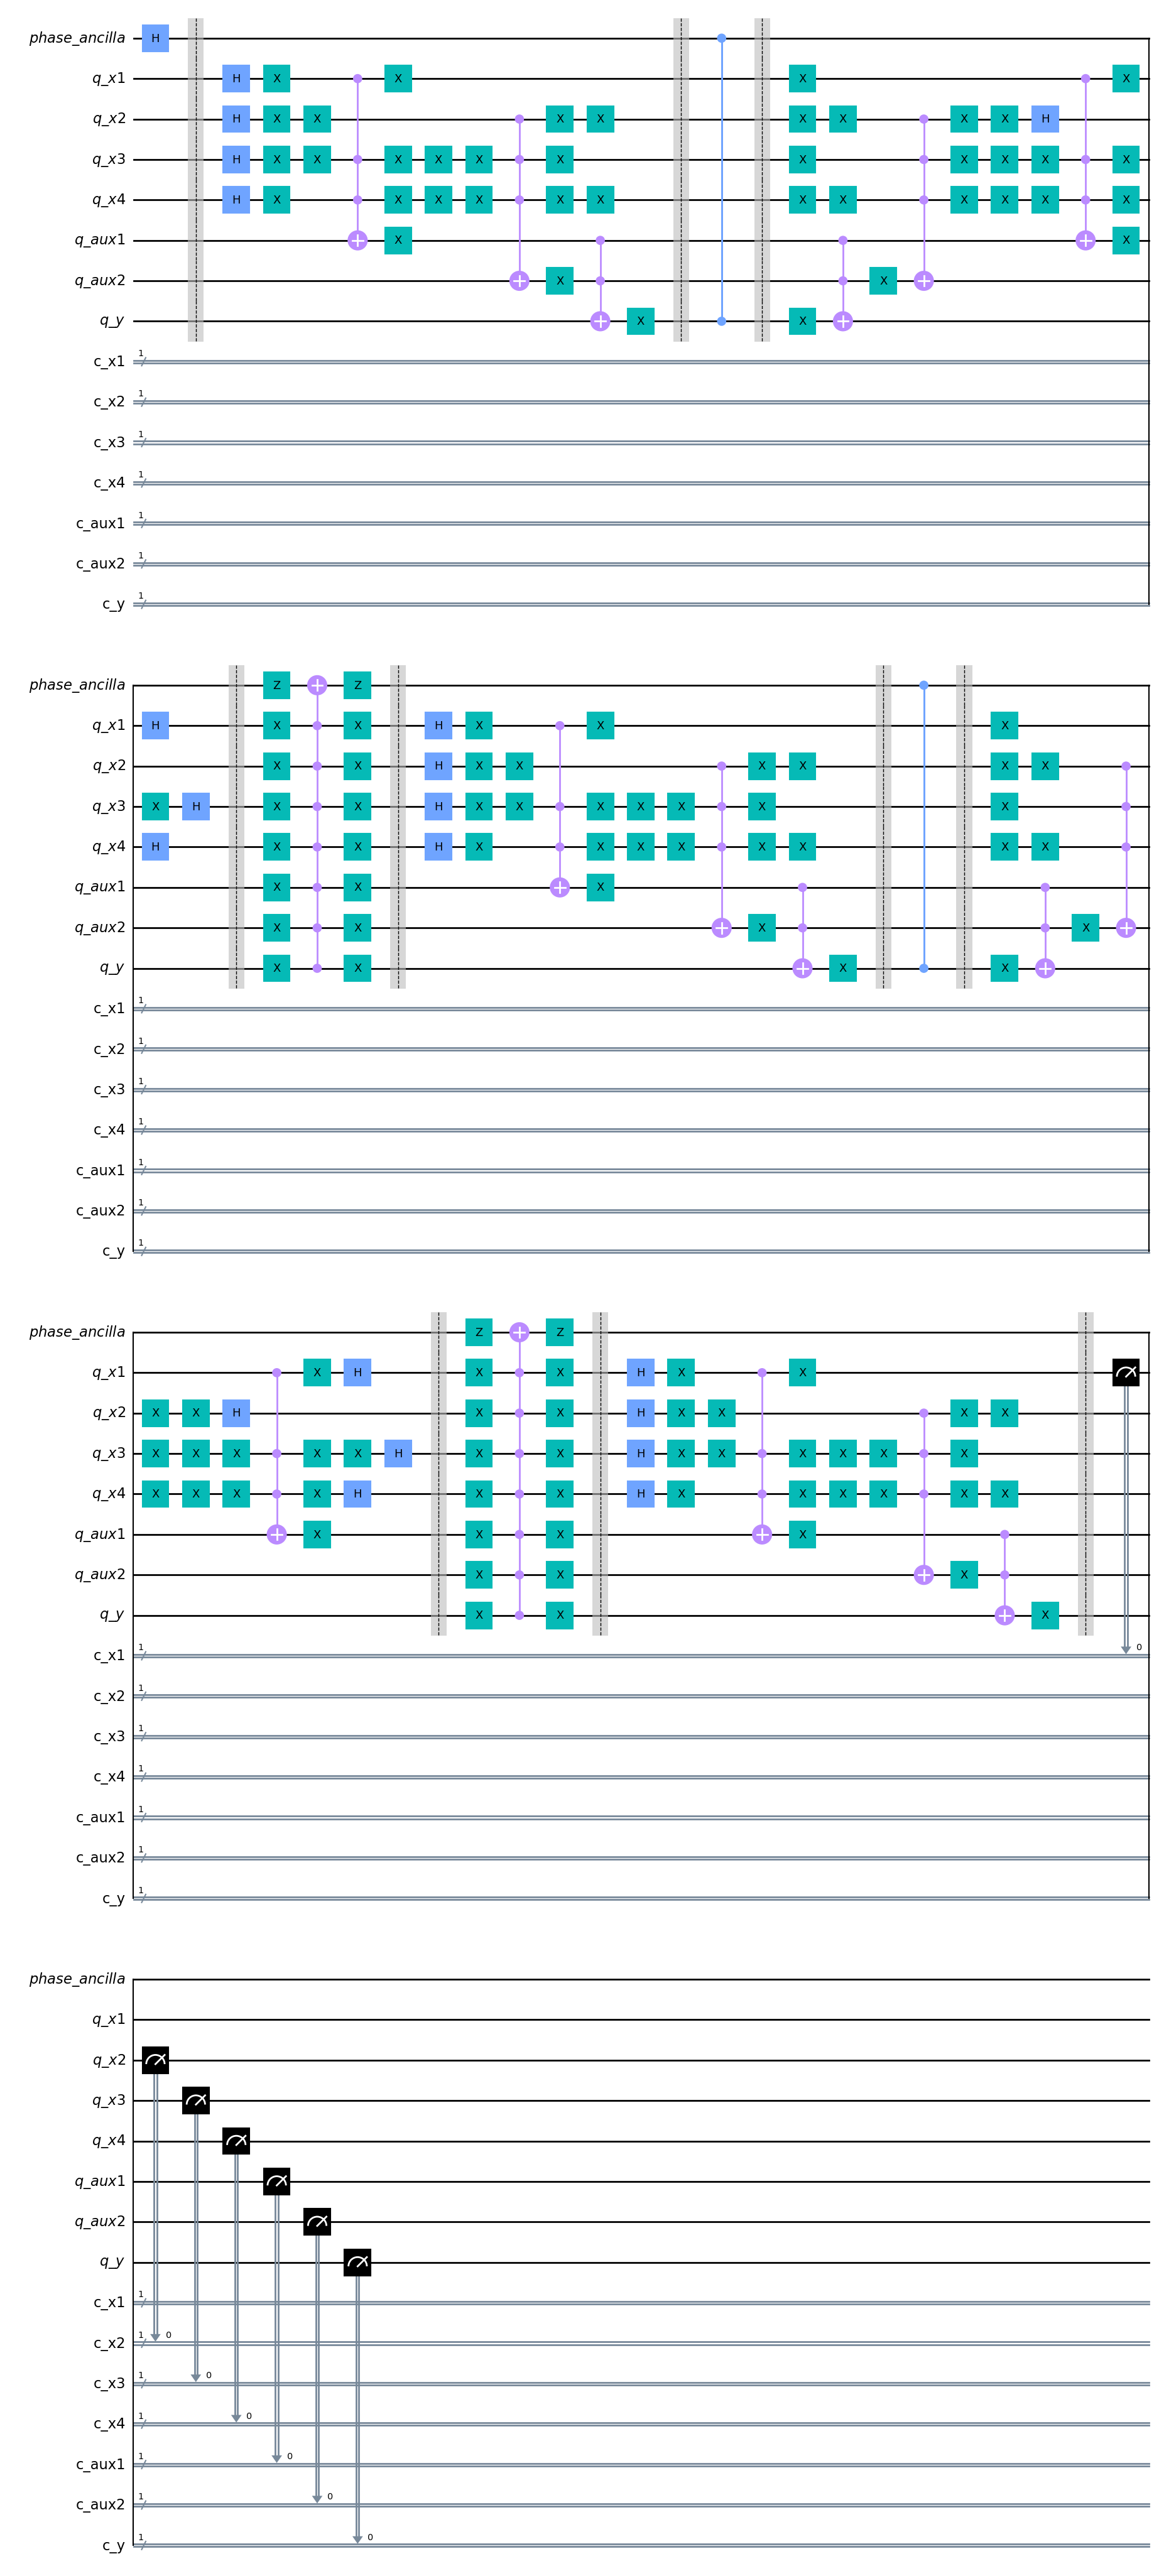

In [3]:
mysat = MySat()
mysat.build_all(mysat.y, 2)
mysat.circ.draw(output='mpl')

In [4]:
mysat.simulate()

,x1,x2,x3,x4,aux1,aux2,y,$freq
0,0,1,1,0,0,1,1,264
1,1,1,0,1,1,0,1,243
2,0,0,1,0,0,1,1,237
3,0,1,0,1,1,0,1,229
4,1,0,1,1,1,1,0,7
5,1,0,1,0,1,1,0,6
6,0,1,0,0,1,1,0,6
7,0,0,1,1,1,1,0,5
8,1,0,0,0,1,1,0,5
9,0,0,0,1,1,1,0,5
